<a href="https://colab.research.google.com/github/pollymelo/imersao_dados_alura/blob/main/Imers%C3%A3oAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AULA 1 (Explore Dados com Pandas)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
# não tem parênteses porque é um atributo, não tem um método e nem uma
# função é um vetor de 2 posições

df.shape

(133349, 11)

In [7]:
# informar quantas linhas e colunas tem. as linhas está na posição 0 e as
# colunas está na posição 1

linhas, colunas = df.shape[0], df.shape[1]
print("linhas:" , linhas)
print("colunas:" , colunas)

linhas: 133349
colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
# Mapeamento das colunas para português brasileiro
colunas = {
    'work_year': 'ano',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'tipo_emprego',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_salario',
    'salary_in_usd': 'salario_em_usd',
    'employee_residence': 'residencia_empregado',
    'remote_ratio': 'taxa_remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
}

# Renomear as colunas do DataFrame
df.rename(columns=colunas, inplace=True)

# Exibir as colunas traduzidas
print(df.columns)

Index(['ano', 'nivel_experiencia', 'tipo_emprego', 'cargo', 'salario',
       'moeda_salario', 'salario_em_usd', 'residencia_empregado',
       'taxa_remoto', 'localizacao_empresa', 'tamanho_empresa'],
      dtype='object')


In [10]:
# Mapeamento das colunas para português brasileiro
colunas = {
    'work_year': 'ano',
    'nivel_experiencia': 'senioridade',
    'tipo_emprego': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'moeda_salario': 'moeda',
    'salario_em_usd': 'usd',
    'residencia_empregado': 'residencia',
    'taxa_remoto': 'remoto',
    'localizacao_empresa': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Renomear as colunas do DataFrame
df.rename(columns=colunas, inplace=True)

# Exibir as colunas traduzidas
print(df.columns)

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [11]:
# Contar os vvalores de cada categoria

df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
# 0 = trabalhos presenciais
# 100 = trabalho remoto
# 50 = vagas híbridas

df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [13]:
# M = média
# L = grande
# S = pequena

df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [14]:
# Mapeamento das categorias de senioridade para português
senioridade_traduzida = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

# Traduzir as categorias na coluna 'senioridade'
df['senioridade'] = df['senioridade'].replace(senioridade_traduzida)

# Contar os valores de cada categoria traduzida
df["senioridade"].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [15]:
# Mapeamento das categorias de contrato para português
contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}

# Traduzir as categorias na coluna 'contrato'
df['contrato'] = df['contrato'].replace(contrato)

# Contar os valores de cada categoria traduzida
df["contrato"].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [16]:
# Mapeamento das categorias de tamanho_empresa para português
tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
}

# Traduzir as categorias na coluna 'tamanho_empresa'
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

# Contar os valores de cada categoria traduzida
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [17]:
# Mapeamento das categorias de remoto para português
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

# Traduzir as categorias na coluna 'remoto'
df['remoto'] = df['remoto'].replace(remoto)

# Contar os valores de cada categoria traduzida
df["remoto"].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [19]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


# AULA 2 (Aprenda a Limpar e os Preparar Dados)


In [20]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [22]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [23]:
# axis é de dimensão

df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [24]:
import numpy as np

# criação de um dataframe de teste para usar de exemplo
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# a coluna nova (salario_media) preenche os valores nan e coloca a média
# round2 = está arredondando em duas casas decimais
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# a mediana suavisa os salários do Bruno e da Daniele não deixando uma
# discrepância grande
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [25]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Teça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

# Criar nova coluna
# O ffill vai completar com o valor anterior (no caso o valor anterior é 30)
df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas



,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Teça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [26]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Teça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

# Criar uma nova coluna
# O bfill vai completar com o valor posterior (no caso o valor posterior é 28)
df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Teça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [27]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

# Criar uma nova coluna
# O fillna substituiu o valor nulo por 'Não Informado'
df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna("Não Informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não Informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não Informado
4,Val,Belém,Belém


In [28]:
# Remove valores nulos
df_limpo = df.dropna()

In [29]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [30]:
#2025.0 não faz sentido.
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [31]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [32]:
# A base de dados(df_limpo) vai receber(=) df_limpo, vai ser reconfigurada
# (assign) vai mudar toda a coluna ano e ela vai receber ano anterior
# só com um novo tipo de info (float para int)
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [33]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


**AULA 3**


# AULA 3 (Crie Gráficos e conte histórias com Dados)

In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

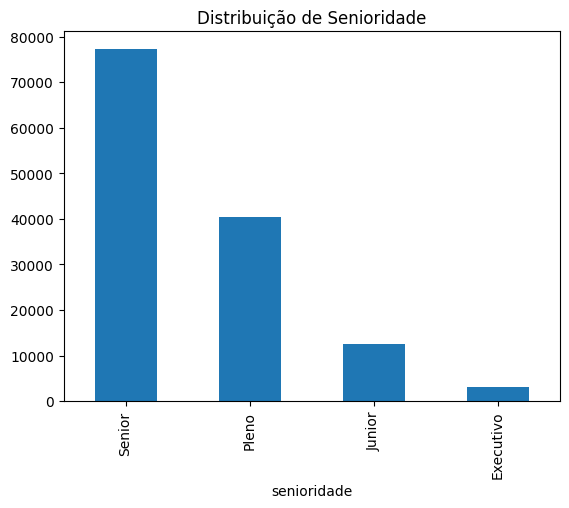

In [35]:
# Criando gráfico com Pandas
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [36]:
# Consegue incrementar com estatística
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

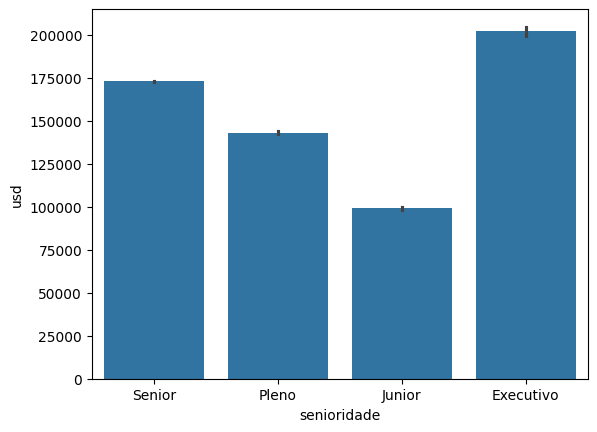

In [37]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [38]:
# O Pandas e o Seaborn usam o Matplotlib para os gráficos
import matplotlib.pyplot as plt

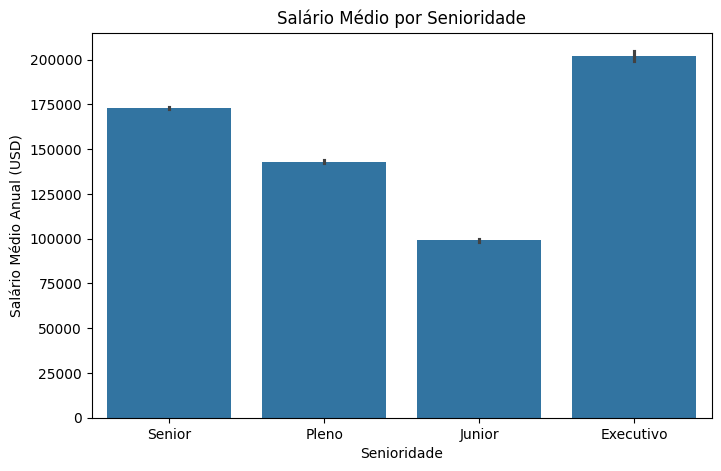

In [39]:
# Determinando o tamanho da figura
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [40]:
# Deixando em ordem (do maior para o menor)
# groupby = consegue fazer agrupamentos e ordenações
# as ordenações são feitas de acordo com alguma estatística
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [41]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

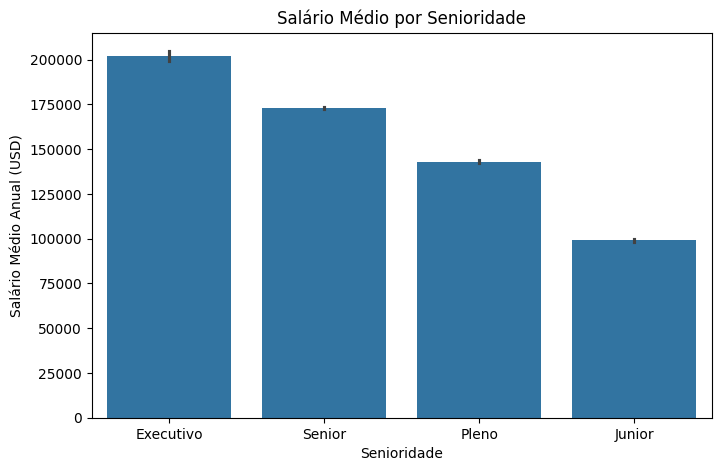

In [42]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

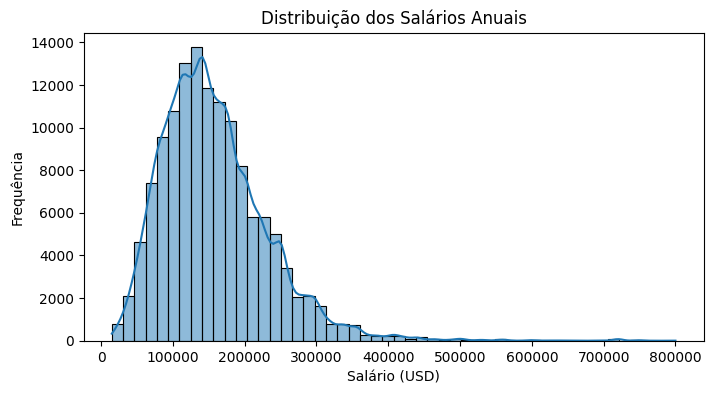

In [43]:
# Bins = vai definir qual vai ser o intervalo das barras que vai ser gerado
# Histograma mostra a frequência dos valores
plt.figure(figsize=(8, 4))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos Salários Anuais')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

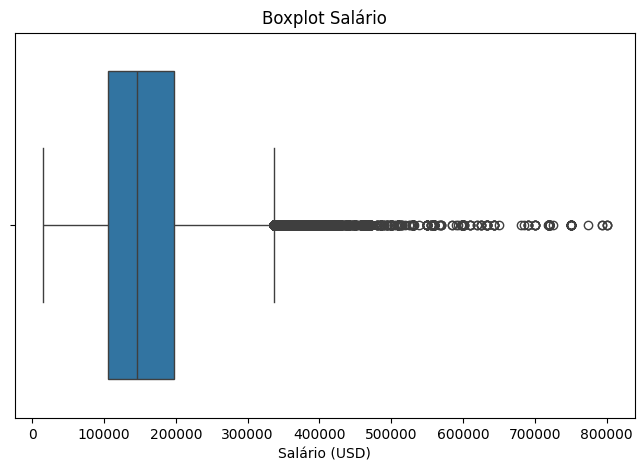

In [44]:
# Visualização técnica
# Mostra a distribuição com algumas caixinha que possui
# uma extremidade de um lado e do outro mostrando a variância
# a linha do meio é uma mediana
# tem quartis de 25% e de 75%
# os pontinhos são os outliers (discrepantes)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot Salário')
plt.xlabel('Salário (USD)')
plt.show()

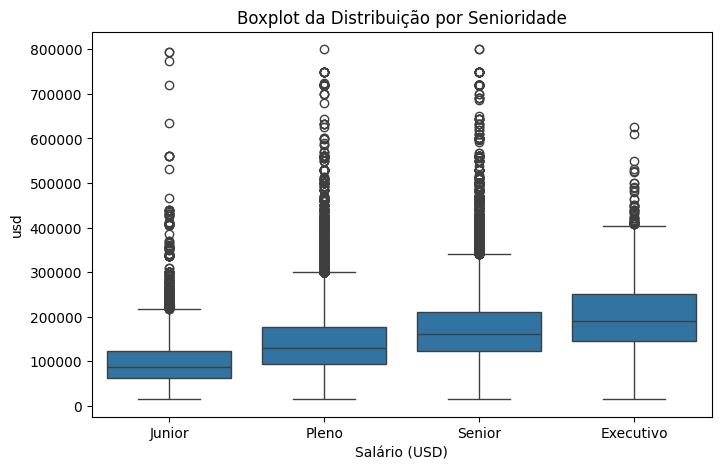

In [45]:
# Pode pensar em contratação
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Boxplot da Distribuição por Senioridade')
plt.xlabel('Salário (USD)')
plt.show()

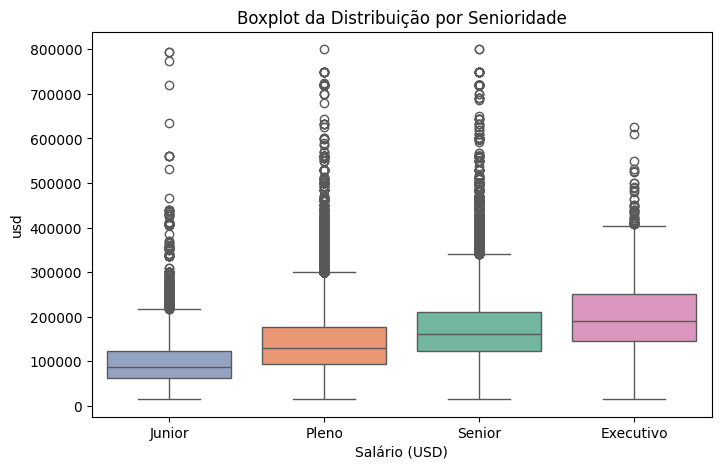

In [46]:
# Hue vai colocar uma cor para cada categoria
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot da Distribuição por Senioridade')
plt.xlabel('Salário (USD)')
plt.show()

In [47]:
# Criar gráficos interativos
import plotly.express as px

In [48]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o ploty
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})
fig.show()

In [49]:
# Contando frequência
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção do Tipo de Trabalho')
fig.show()


In [50]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção do Tipo de Trabalho',
             hole=0.5)
fig.show()

In [51]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção do Tipo de Trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

# Desafio

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
# Filtrar o cargo 'Data Scientist'
cientista_dados = df_limpo[df_limpo['cargo'] == 'Data Scientist']

# Agrupar por país e calcular o salário médio
salario_por_pais = cientista_dados.groupby('empresa')['usd'].mean().sort_values(ascending=False).reset_index()

# Criar o gráfico de linha interativo
fig = px.line(
    salario_por_pais,
    x='empresa',
    y='usd',
    title='Salário Médio para Cientista de Dados por País',
    labels={'empresa': 'País', 'usd': 'Salário Médio Anual (USD)'},
    color_discrete_sequence=['red'])
fig.show()

# Desafio (Solução da Alura)

In [52]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.2 MB/s eta 0:00:00


In [60]:
import pycountry

# Função para converter ISO-2 para ISO-3 (três letras dos países)
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3 com a função apply
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

# Criar CSV

In [59]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [61]:
# Index falso para não criar um novo index
df_limpo.to_csv('dados-imersao-final.csv', index=False)